# Data visualization for the BP addresses

See below for a Sankey chart showing the flow of transactions from the BP addresses.

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import altair as alt

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
data_directory = '../jsonl/producerpay'
df = pd.DataFrame()
for data_file in [join(data_directory, f) for f in listdir(data_directory) if isfile(join(data_directory, f))]:
    df = pd.concat([df, pd.read_json(data_file, lines=True)])

In [4]:
df = pd.merge(df, pd.DataFrame({'total_EOS' : df[df.token == 'EOS'].groupby('account')['amount'].sum()}), on='account').reset_index()
df['amount_ratio'] = df['amount']/df['total_EOS']

In [5]:
df

,index,account,date,timestamp,amount,token,from,to,block_num,transaction_id,memo,contract,action,total_EOS,amount_ratio
0,0,eosio.bpay,2022-10-21 00:03:31,2022-10-21 00:03:31,344.5222,EOS,eosio.bpay,newdex.bp,274268407,353555074901da28cd6dd64b0b64e73f12fdc86a91c8ad...,producer block pay,eosio.token,transfer,14127.2618,0.024387
1,1,eosio.bpay,2022-10-21 00:03:49,2022-10-21 00:03:49,344.5222,EOS,eosio.bpay,aus1genereos,274268443,504ff8fadb162c2cde9777c0ee8cd69301a97579ce1e15...,producer block pay,eosio.token,transfer,14127.2618,0.024387
2,2,eosio.bpay,2022-10-21 00:27:31,2022-10-21 00:27:31,344.0244,EOS,eosio.bpay,starteosiobp,274271284,1a5719345a8777b36ce6b016159cd7f2e8ed4f358f1db7...,producer block pay,eosio.token,transfer,14127.2618,0.024352
3,3,eosio.bpay,2022-10-21 01:23:42,2022-10-21 01:23:42,343.9339,EOS,eosio.bpay,eosflytomars,274278026,0439ccdbaac893021ee1bd6e28ed89bcbc85ad09b69234...,producer block pay,eosio.token,transfer,14127.2618,0.024345
4,4,eosio.bpay,2022-10-21 01:40:55,2022-10-21 01:40:55,344.5178,EOS,eosio.bpay,eoslaomaocom,274280092,ef6b1486a94b26d025219652ad98bf2d10e7551a9628af...,producer block pay,eosio.token,transfer,14127.2618,0.024387
5,5,eosio.bpay,2022-10-21 02:30:54,2022-10-21 02:30:54,343.5573,EOS,eosio.bpay,eosnationftw,274286088,56ea301f527ea9aee7ee8dd1051aa9798b0f9422e019e2...,producer block pay,eosio.token,transfer,14127.2618,0.024319
6,6,eosio.bpay,2022-10-21 03:02:54,2022-10-21 03:02:54,344.5200,EOS,eosio.bpay,eoscannonchn,274289928,793685dd5aa3ef5e8a51bebd9afb9ee9e6d07088cb5dbb...,producer block pay,eosio.token,transfer,14127.2618,0.024387
7,7,eosio.bpay,2022-10-21 03:10:04,2022-10-21 03:10:04,346.0256,EOS,eosio.bpay,ivote4eosusa,274290787,d46c410b24dd7b4e5796d16e0ef4281ac6ef2564a97e6a...,producer block pay,eosio.token,transfer,14127.2618,0.024493
8,8,eosio.bpay,2022-10-21 04:00:37,2022-10-21 04:00:37,344.5166,EOS,eosio.bpay,hashfineosio,274296852,520c93b1c9bccb62d60746068012803058d91301a8d0f6...,producer block pay,eosio.token,transfer,14127.2618,0.024387
9,9,eosio.bpay,2022-10-21 05:07:12,2022-10-21 05:07:12,344.5124,EOS,eosio.bpay,blockpooleos,274304841,e7ea3cac48071548fdcfeeeb17a2f0c8a62cd700b5ea2a...,producer block pay,eosio.token,transfer,14127.2618,0.024386


In [6]:
from pysankey import sankey

 The following arguments are deprecated and should be removed: figSize in sankey()


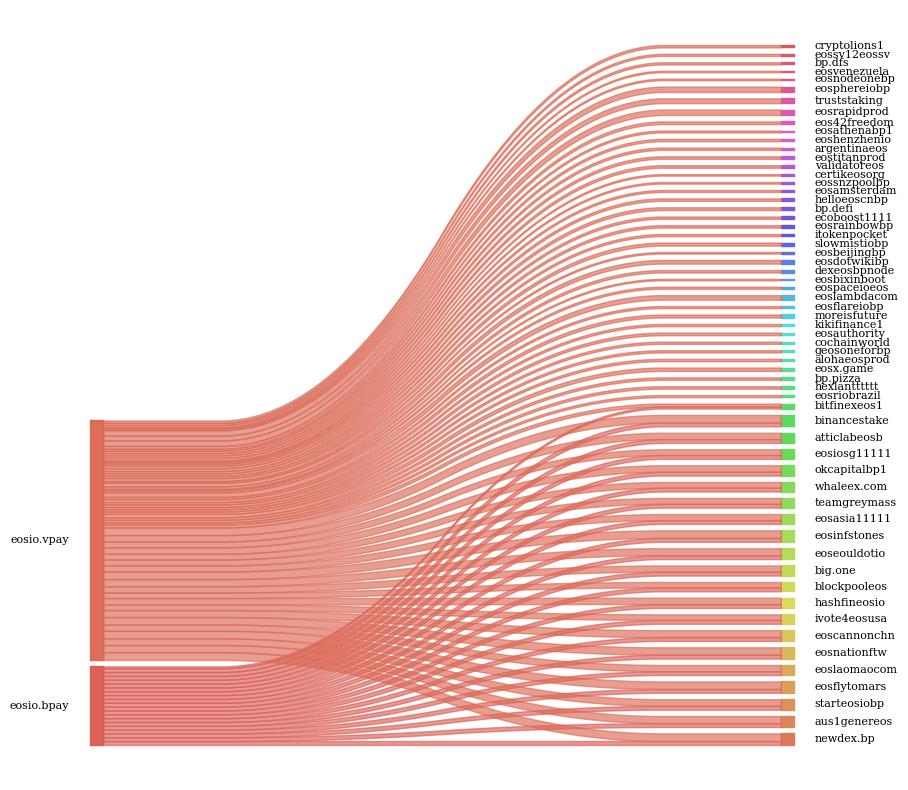

In [7]:
weight = df['amount'].astype(float)
ax = sankey(
      left=df['from'], right=df['to'],
      rightWeight=weight, leftWeight=weight, aspect=2, fontsize=8, figSize=(10, 10)
)